# Jimmy Wrangler - Data Explorer

This Project purpose is to see how olympics medalists data from 1896 to 2008 is correlated with International olympic committee
based on NOC code and then explore how different countries fared in the olympics

NOC- National olympic committee:<br>
    These are responsible for organizing their people's participation in the Olympics. All NOCs linked to a unique team

# Importing First Data set and Pandas

In [1]:
import pandas as pd

In [124]:
olympics=pd.read_csv('../data/raw/Summer_Olympics_1896_to_2008.csv')

In [125]:
olympics.head()

,"List of medallists at the Games of the Olympiad per edition, sport, discipline, gender and event",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DISCLAIMER: The IOC Research and Reference Ser...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
4,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold


# Cleaning the First Data Set

Above Dataset has some unnecessary rows, let's clean the data

In [127]:
olympics=pd.read_csv('../data/raw/Summer_Olympics_1896_to_2008.csv',skiprows=4)

In [5]:
olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


## Exploring First Data set

In [132]:
olympics.shape

(29216, 10)

In [129]:
olympics.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

In [130]:
olympics.describe()

,Edition
count,29216.000000
mean,1967.713171
std,32.406293
min,1896.000000
25%,1948.000000
50%,1976.000000
75%,1996.000000
max,2008.000000


# Importting the second dataset

In [6]:
countries=pd.read_csv('../data/raw/Countries_NOC_Population.csv')

## Exploring the second dataset

In [7]:
countries.head()

,Country,NOC,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [133]:
countries.columns

Index(['Country', 'NOC', 'Population', 'GDP per Capita'], dtype='object')

In [135]:
countries.shape

(204, 4)

In [136]:
countries.describe()

,Population,GDP per Capita
count,1.960000e+02,176.000000
mean,3.722825e+07,12882.556131
std,1.399655e+08,17747.141204
min,1.022200e+04,277.068309
25%,1.638278e+06,1781.096847
50%,7.450124e+06,5233.583395
75%,2.557454e+07,15494.683643
max,1.371220e+09,101449.968200


### Cleaning the dataframes: Checking for null values, removing un-necessary columns

In [12]:
olympics.isnull().sum()

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64

In [13]:
countries.isnull().sum()

Country            0
NOC                0
Population         8
GDP per Capita    28
dtype: int64

In [18]:
olympics.drop(columns=['Event_gender','City'],inplace=True)

# Formulate one or two ideas on how the data sets could be combined to establish additional value using exploratory data analysis

Merging the dataset with the first and second dataset could give us insights like:<br>
1.Country's performance overall in all olympic games(no of medals etc..) <br>
2.Country's performance in a particular edition in a specific event or proportion of medals won<br>
3.How men and women from each country fared overall<br>

# Merging two dataframes on "NOC"

In [33]:
olympics_country= pd.merge(olympics,countries,on="NOC")

In [137]:
olympics_country.columns

Index(['Edition', 'Sport', 'Discipline', 'Athlete', 'Gender', 'Event', 'Medal',
       'Country'],
      dtype='object')

In [138]:
olympics_country.shape

(23898, 8)

In [139]:
olympics_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23898 entries, 0 to 23897
Data columns (total 8 columns):
Edition       23898 non-null int64
Sport         23898 non-null object
Discipline    23898 non-null object
Athlete       23898 non-null object
Gender        23898 non-null object
Event         23898 non-null object
Medal         23898 non-null object
Country       23898 non-null object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


### Dropping un-necessary columns in merged data-frame

In [34]:
olympics_country.drop(columns=['NOC','Population','GDP per Capita'],inplace=True)
olympics_country.head()

,Edition,Sport,Discipline,Athlete,Gender,Event,Medal,Country
0,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,100m freestyle,Gold,Hungary
1,1896,Aquatics,Swimming,"HAJOS, Alfred",Men,1200m freestyle,Gold,Hungary
2,1896,Athletics,Athletics,"SZOKOLYI, Alajos",Men,100m,Bronze,Hungary
3,1896,Athletics,Athletics,"DANI, Nandor",Men,800m,Silver,Hungary
4,1896,Athletics,Athletics,"KELLNER, Gyula",Men,marathon,Bronze,Hungary


In [141]:
olympics_country.to_csv("../Data/processed/Processed_olympic_countries_dataset.csv")

### 1.Each country's performance overall in all  olympic games.

In [39]:
import matplotlib.pyplot as plt

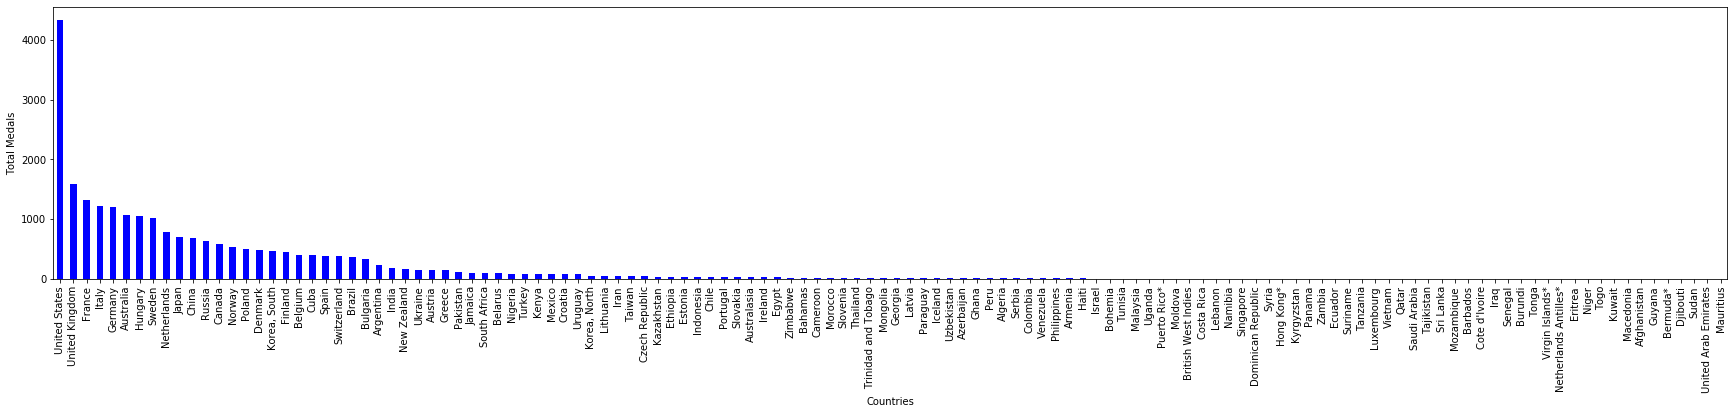

In [67]:
olympics_country.Country.value_counts().plot(kind="bar",figsize=(30,5),color='b')
plt.xlabel('Countries')
plt.ylabel('Total Medals')
plt.show()

Top 5 Countries across all olympics

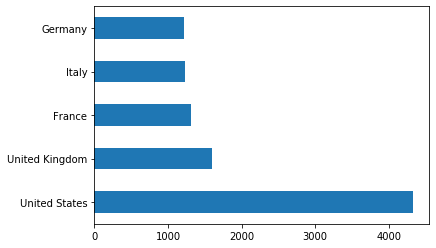

In [72]:
olympics_country.Country.value_counts().head().plot(kind='barh')

### 2.Country's performance in a particular edition in a specific event and  proportion of medals won<br>

In [76]:
ye_2008= olympics_country[olympics_country.Edition==2008]

In [105]:
ye_2008_usa=ye_2008.groupby('Country').get_group('United States')
ye_2008_usa.head()

,Edition,Sport,Discipline,Athlete,Gender,Event,Medal,Country
5364,2008,Aquatics,Swimming,"PEIRSOL, Aaron",Men,100m backstroke,Gold,United States
5365,2008,Aquatics,Swimming,"GREVERS, Matt",Men,100m backstroke,Silver,United States
5366,2008,Aquatics,Swimming,"HOELZER, Margaret",Women,100m backstroke,Bronze,United States
5367,2008,Aquatics,Swimming,"COUGHLIN, Natalie",Women,100m backstroke,Gold,United States
5368,2008,Aquatics,Swimming,"SONI, Rebecca",Women,100m breaststroke,Silver,United States


In [108]:
ye_2008_usa[ye_2008_usa['Event']=="100m"]

,Edition,Sport,Discipline,Athlete,Gender,Event,Medal,Country
5459,2008,Athletics,Athletics,"DIX, Walter",Men,100m,Bronze,United States


Text(0.5, 1.0, 'United States in 2008 Olympics')

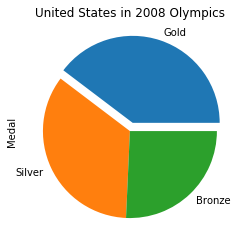

In [121]:
explode = (0.1,0,0)
ye_2008_usa.Medal.value_counts().plot(kind="pie", explode=explode)
plt.title("United States in 2008 Olympics")

### 3. How men and women from a particular country fared overall across all editions

In [115]:
import seaborn as sns
countyr_ger=olympics_country[(olympics_country.Country=="Germany")]
countyr_ger.head()

,Edition,Sport,Discipline,Athlete,Gender,Event,Medal,Country
5679,1896,Athletics,Athletics,"HOFMANN, Fritz",Men,100m,Silver,Germany
5680,1896,Cycling,Cycling Road,"GOEDRICH, August",Men,individual road race,Silver,Germany
5681,1896,Gymnastics,Artistic G.,"WEINGÄRTNER, Hermann",Men,horizontal bar,Gold,Germany
5682,1896,Gymnastics,Artistic G.,"FLATOW, Alfred",Men,horizontal bar,Silver,Germany
5683,1896,Gymnastics,Artistic G.,"FLATOW, Alfred",Men,parallel bars,Gold,Germany


Text(0.5, 1.0, 'Germany Men and Women across all editions')

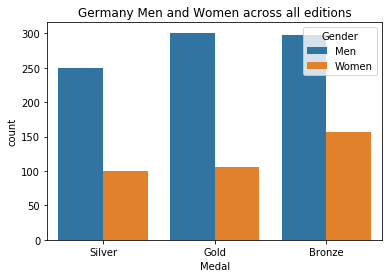

In [118]:
sns.countplot(x="Medal",data=countyr_ger,hue="Gender")
plt.title("Germany Men and Women across all editions")